In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
family_heights = Table.read_table('data/family_heights.csv')
family_heights

family,father,mother,midparentHeight,children,childNum,sex,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [3]:
heights = family_heights.relabeled(['midparentHeight', 'childHeight'], ['MidParent', 'Child']).select('MidParent', 'Child')
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


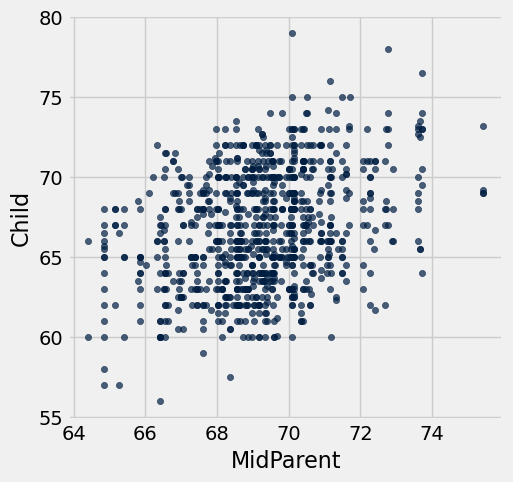

In [4]:
heights.scatter('MidParent')

In [5]:
def predict_child(mpht):
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()     

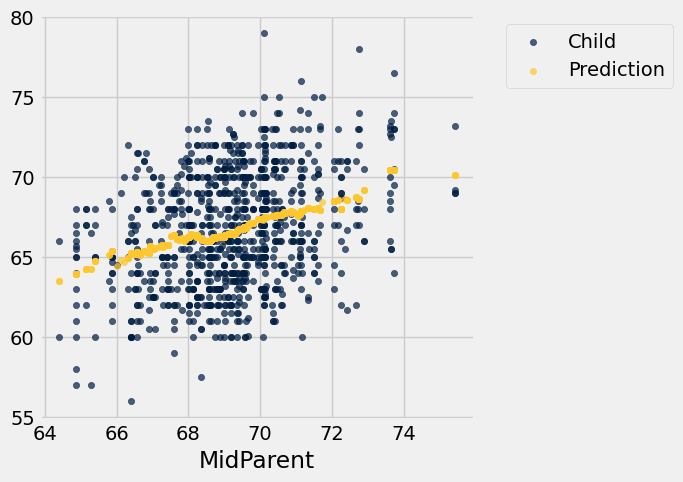

In [6]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

heights_with_predictions.scatter('MidParent')

In [7]:
hybrid = Table.read_table('data/hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


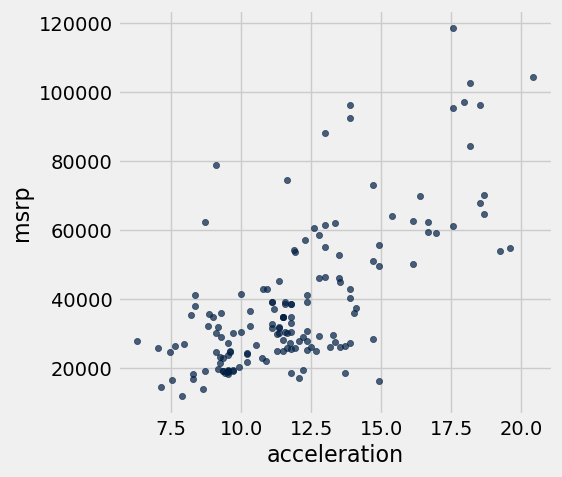

In [8]:
hybrid.scatter('acceleration', 'msrp')

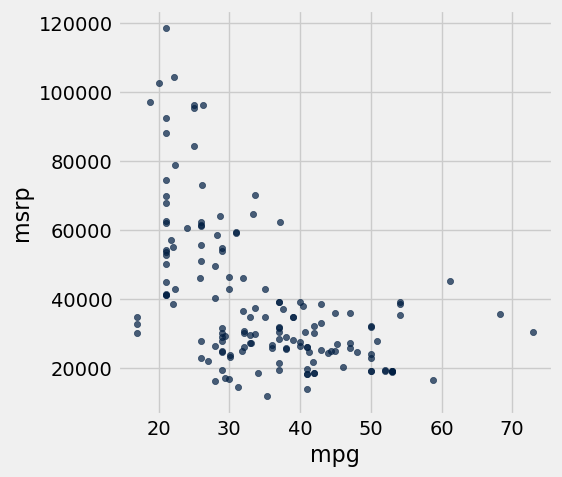

In [9]:
hybrid.scatter('mpg', 'msrp')

In [10]:
# ^ not linear!

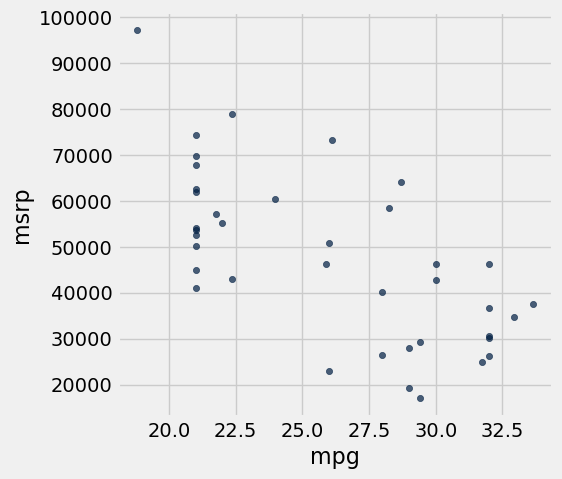

In [11]:
suv = hybrid.where('class', 'SUV')
suv.scatter('mpg', 'msrp')

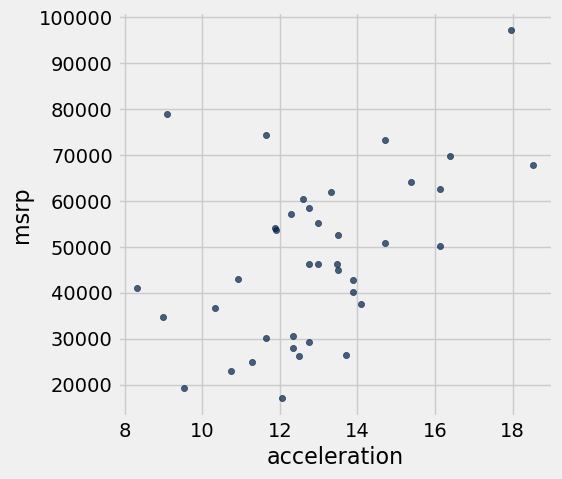

In [12]:
suv.scatter('acceleration', 'msrp')

In [13]:
def standard_units(any_numbers):
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

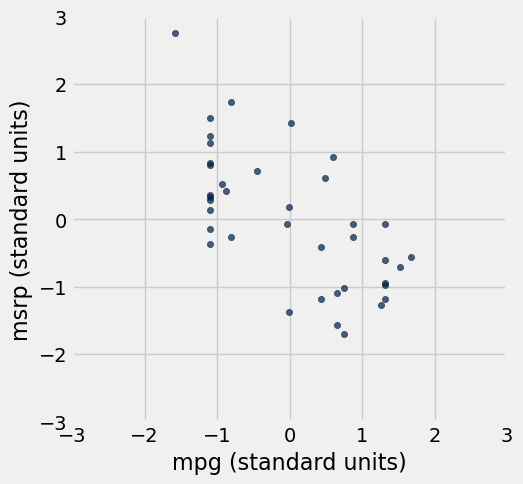

In [14]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plt.xlim(-3, 3)
plt.ylim(-3, 3);

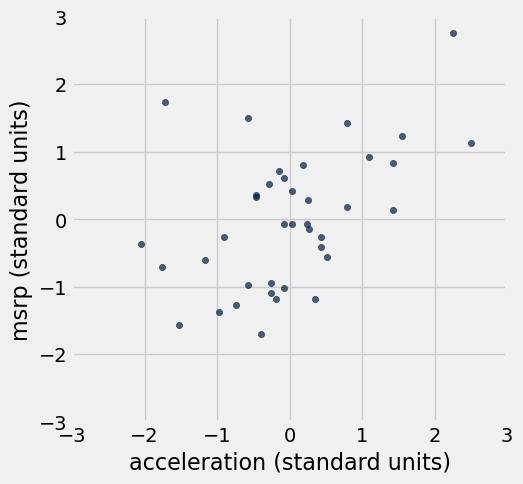

In [15]:
Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plt.xlim(-3, 3)
plt.ylim(-3, 3);

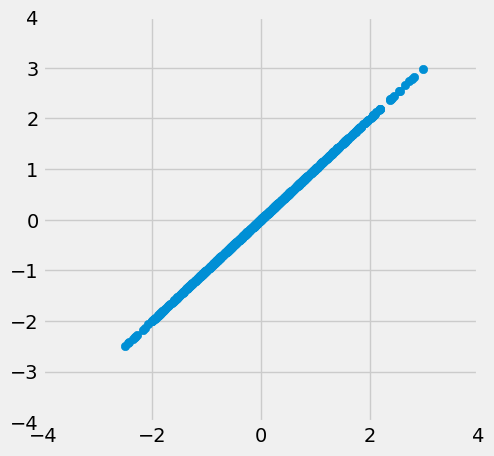

In [16]:
# don't worry about this code
def r_scatter(r):
    'Generate a scatter plot with a correlation approximately r'
    plt.figure(figsize=(5,5))
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.scatter(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

r_scatter(1)

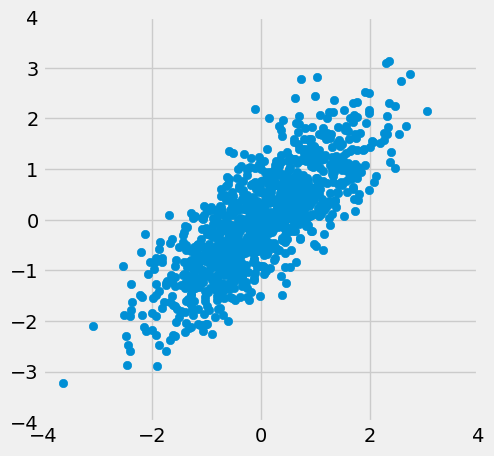

In [17]:
r_scatter(0.8)

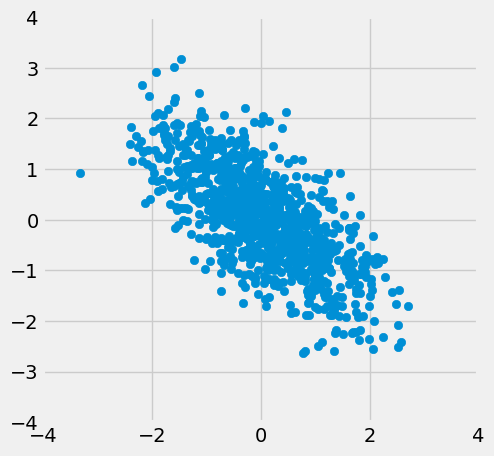

In [18]:
r_scatter(-0.7)

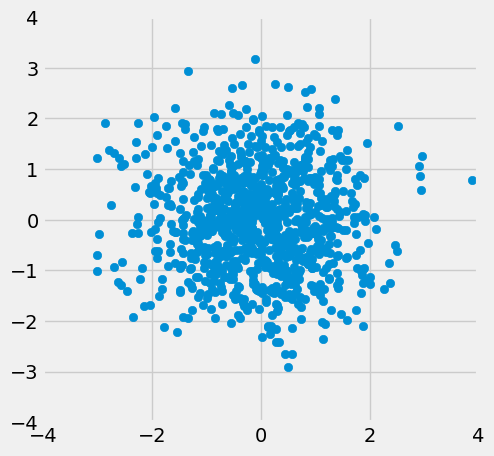

In [19]:
r_scatter(0)

In [20]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


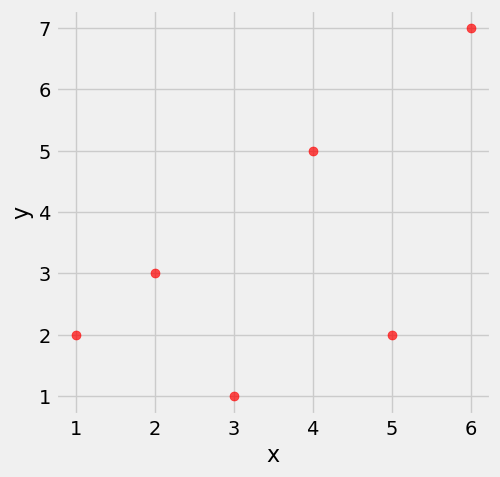

In [21]:
t.scatter(0, 1, s=42, color='red')

In [22]:
t_su = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t_su

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


In [23]:
t_product = t_su.with_column('product of standard units', t_su.column(2) * t_su.column(3))
t_product

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [24]:
r = np.mean(t_product.column(4))
r

0.61741639718977093

In [25]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

In [26]:
correlation(t, 'x', 'y')

0.61741639718977093

In [27]:
correlation(t, 'y', 'x')

0.61741639718977093

In [28]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

In [29]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

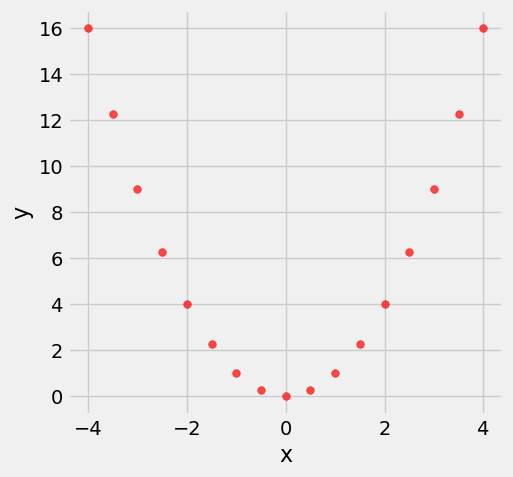

In [30]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [31]:
correlation(nonlinear, 'x', 'y')

0.0

0.0

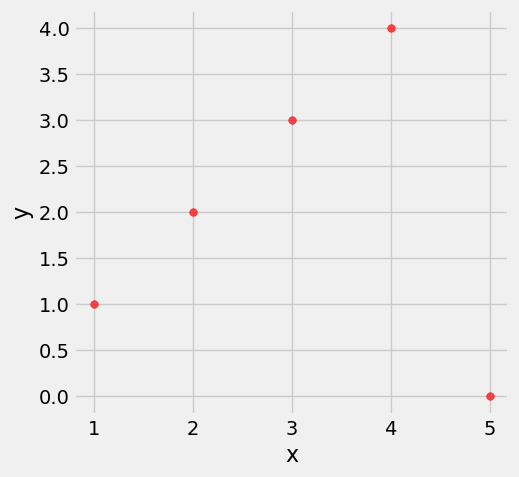

In [32]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')
correlation(outlier, 'x', 'y')

In [33]:
sat2014 = Table.read_table('data/sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


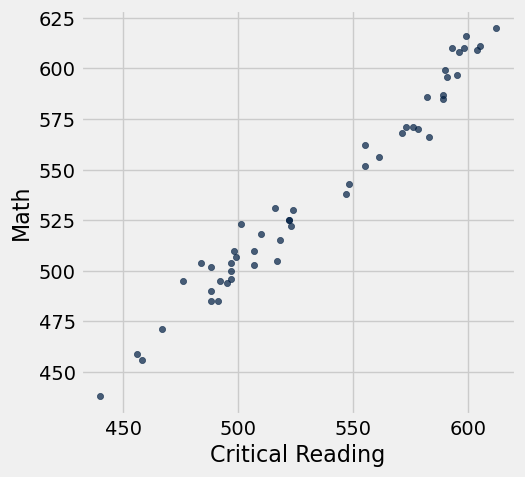

In [34]:
sat2014.scatter('Critical Reading', 'Math')

In [35]:
correlation(sat2014, 'Critical Reading', 'Math')

0.98475584110674341

---

In [37]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


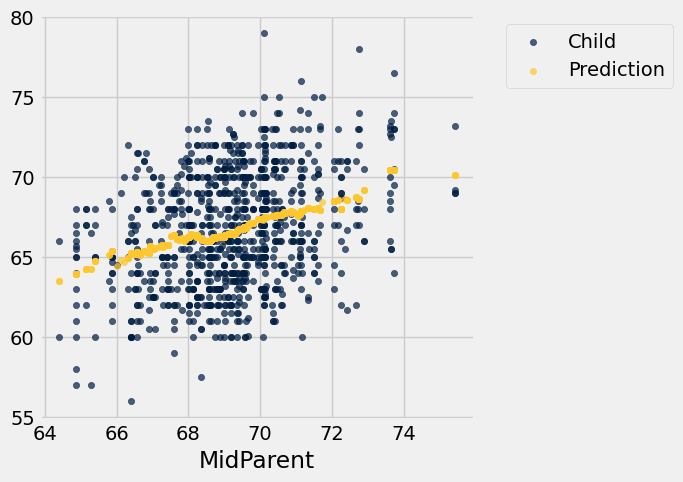

In [36]:
def predict_child(mpht):
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()

heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

heights_with_predictions.scatter('MidParent')

In [39]:
def standard_units(xyz):
    return (xyz - np.mean(xyz)) / np.std(xyz)

heights_SU = Table().with_columns(
    'MidParent SU', standard_units(heights.column('MidParent')),
    'Child SU', standard_units(heights.column('Child'))
)
heights_SU

MidParent SU,Child SU
3.45465,1.80416
3.45465,0.686005
3.45465,0.630097
3.45465,0.630097
2.47209,1.88802
2.47209,1.60848
2.47209,-0.348285
2.47209,-0.348285
1.58389,1.18917
1.58389,0.350559


In [40]:
sd_midparent = np.std(heights.column(0))
sd_midparent

1.8014050969207571

In [41]:
0.5/sd_midparent

0.27756111096536701

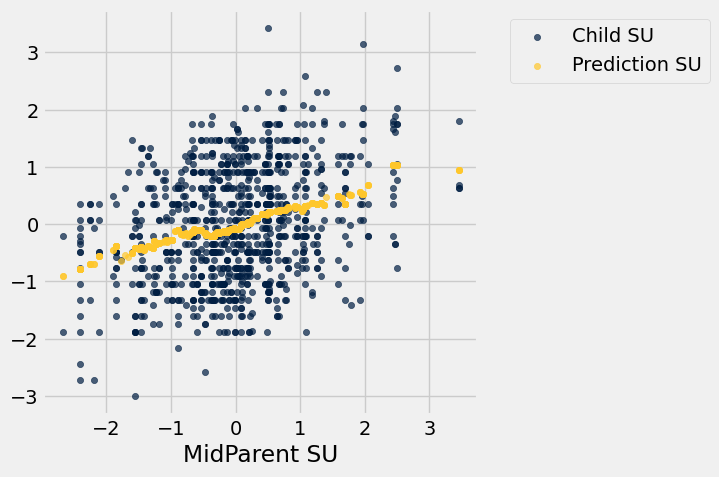

In [43]:
def predict_child_su(mpht_su):
    close = 0.5 / sd_midparent
    close_points = heights_SU.where('MidParent SU', are.between(mpht_su - close, mpht_su + close))
    return close_points.column('Child SU').mean()

heights_with_su_predictions = heights_SU.with_column(
    'Prediction SU', heights_SU.apply(predict_child_su, 'MidParent SU')
    )

heights_with_su_predictions.scatter('MidParent SU')

In [44]:
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

In [45]:
family_r = correlation(heights, 'MidParent', 'Child')
family_r

0.32094989606395924

In [46]:
family_slope = slope(heights, 'MidParent', 'Child')
family_intercept = intercept(heights, 'MidParent', 'Child')
family_slope, family_intercept

(0.63736089696947895, 22.636240549589751)

In [49]:
family_slope * 70.48 + family_intercept

67.557436567998622

In [50]:
heights_with_predictions.where('MidParent', are.equal_to(70.48)).show(3)

MidParent,Child,Prediction
70.48,74,67.6342
70.48,70,67.6342
70.48,68,67.6342


In [51]:
heights_with_predictions = heights_with_predictions.with_column(
    'Regression Prediction', family_slope * heights.column('MidParent') + family_intercept
)
heights_with_predictions

MidParent,Child,Prediction,Regression Prediction
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


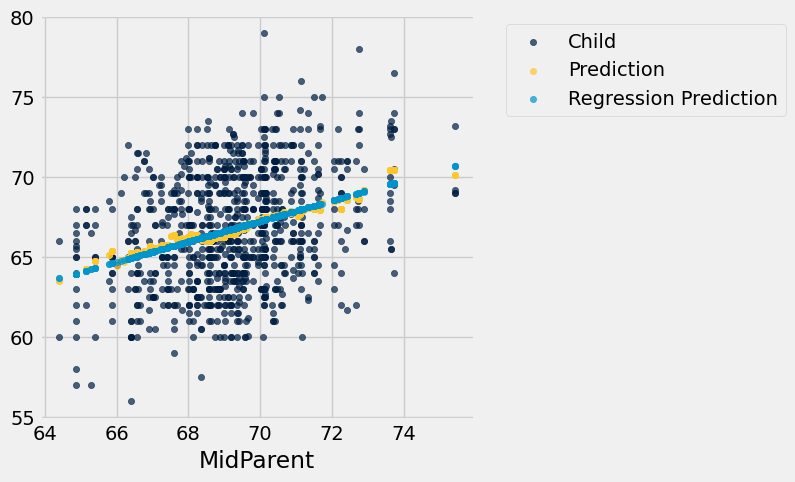

In [52]:
heights_with_predictions.scatter('MidParent')

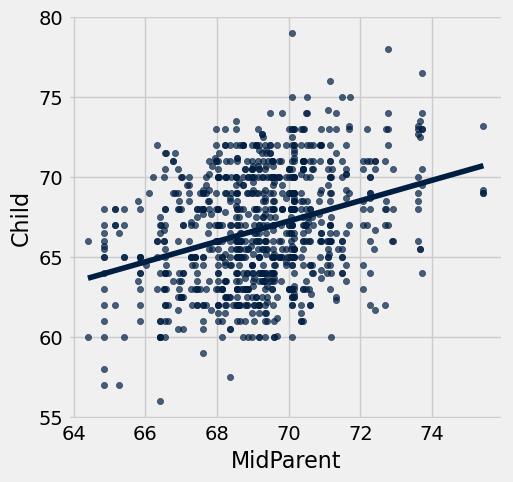

In [53]:
heights.scatter('MidParent', fit_line=True)

---

In [100]:
baby = Table.read_table('data/baby.csv').select('Maternal Height', 'Maternal Pregnancy Weight')
baby

Maternal Height,Maternal Pregnancy Weight
62,100
64,135
64,115
67,125
62,93
62,178
65,140
62,125
66,136
68,120


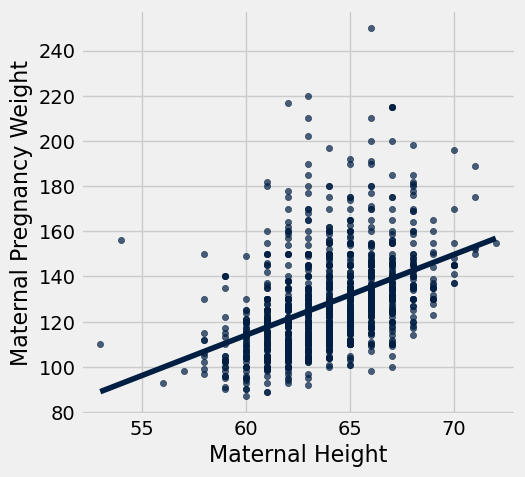

In [101]:
baby.scatter('Maternal Height', 'Maternal Pregnancy Weight', fit_line=True)

In [102]:
correlation(baby, 'Maternal Height', 'Maternal Pregnancy Weight')

0.4352874282612863

In [103]:
regression_slope = slope(baby, 'Maternal Height', 'Maternal Pregnancy Weight')
regression_intercept = intercept(baby, 'Maternal Height', 'Maternal Pregnancy Weight')
make_array(regression_slope, regression_intercept)

array([   3.57284626, -100.35996731])

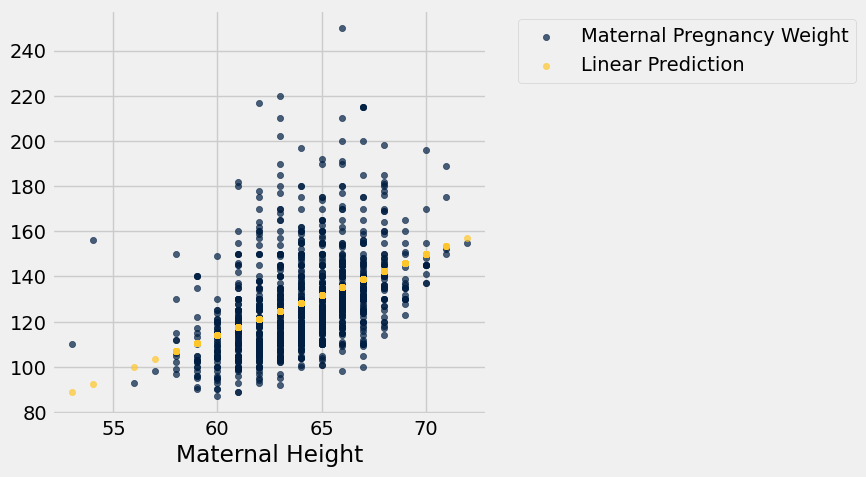

In [104]:
baby = baby.with_column(
    'Linear Prediction', regression_slope * baby.column('Maternal Height') + regression_intercept)
baby.scatter('Maternal Height')

In [105]:
baby

Maternal Height,Maternal Pregnancy Weight,Linear Prediction
62,100,121.157
64,135,128.302
64,115,128.302
67,125,139.021
62,93,121.157
62,178,121.157
65,140,131.875
62,125,121.157
66,136,135.448
68,120,142.594


In [106]:
errors = baby.column('Maternal Pregnancy Weight') - baby.column('Linear Prediction')
baby.with_column('Error', errors)

Maternal Height,Maternal Pregnancy Weight,Linear Prediction,Error
62,100,121.157,-21.1565
64,135,128.302,6.69781
64,115,128.302,-13.3022
67,125,139.021,-14.0207
62,93,121.157,-28.1565
62,178,121.157,56.8435
65,140,131.875,8.12496
62,125,121.157,3.8435
66,136,135.448,0.552114
68,120,142.594,-22.5936


In [107]:
mse = np.average(errors ** 2)
mse

348.15630337870471

In [108]:
rmse = np.average(errors ** 2) ** 0.5
rmse

18.658947006160467

In [109]:
# we'd like to find a function that minimizes rmse

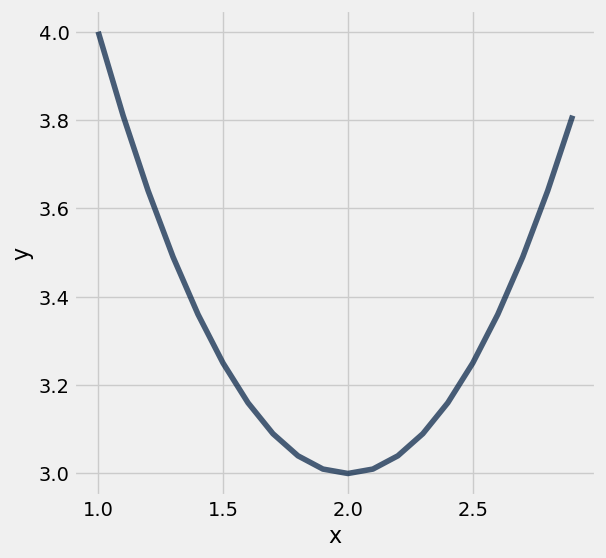

In [110]:
x = np.arange(1, 3, 0.1)
y = (x-2)**2 + 3
Table().with_columns('x', x, 'y', y).plot('x')

In [111]:
def f(x):
    return ((x-2)**2) + 3

In [112]:
minimize(f)

1.9999999946252267

In [118]:
def rmse(any_slope, any_intercept):
    x = baby.column('Maternal Height')
    y = baby.column('Maternal Pregnancy Weight')
    estimate = any_slope * x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5

In [120]:
rmse(5, -100)

93.715343395488034

In [121]:
rmse(50, 100)

3176.2104618216576

In [122]:
make_array(regression_slope, regression_intercept)

array([   3.57284626, -100.35996731])

In [125]:
minimize(rmse, smooth=True)

array([   3.57282815, -100.3588034 ])

In [126]:
shotput = Table.read_table('data/shotput.csv')
shotput

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4
61.3,13
63.6,13.2
66.1,13
70,12.7
92.7,13.9
90.5,15.5
90.5,15.8


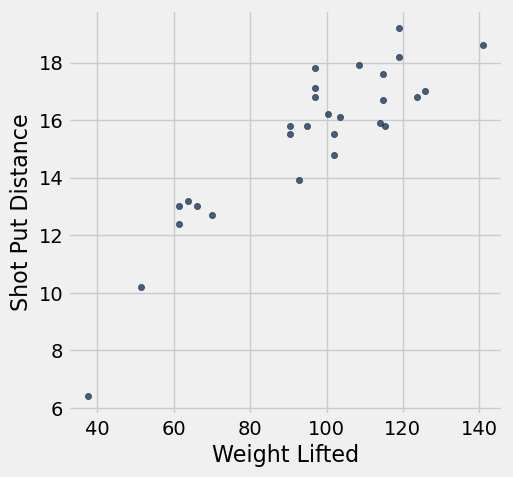

In [127]:
shotput.scatter('Weight Lifted')

In [128]:
def shotput_linear_rmse(any_slope, any_intercept):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = any_slope*x + any_intercept
    return np.mean((y - estimate) ** 2) ** 0.5

best_line = minimize(shotput_linear_rmse)
best_line

array([ 0.09834382,  5.95962883])

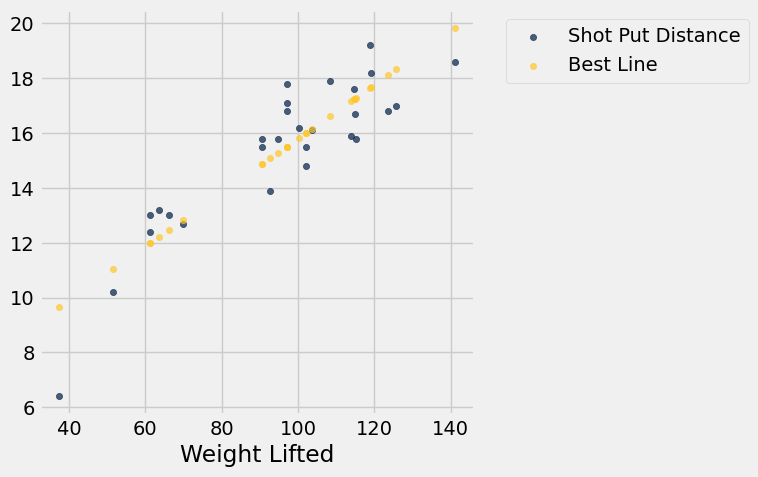

In [131]:
weights = shotput.column(0)
linear_fit = best_line.item(0) * weights + best_line.item(1)

shotput.with_column(
    'Best Line', linear_fit
).scatter(0)

In [132]:
def shotput_quadratic_rmse(a, b, c):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = a*(x**2) + b*x + c
    return np.mean((y - estimate) ** 2) ** 0.5

best_quad = minimize(shotput_quadratic_rmse)
best_quad

array([ -1.04003731e-03,   2.82706003e-01,  -1.53167618e+00])

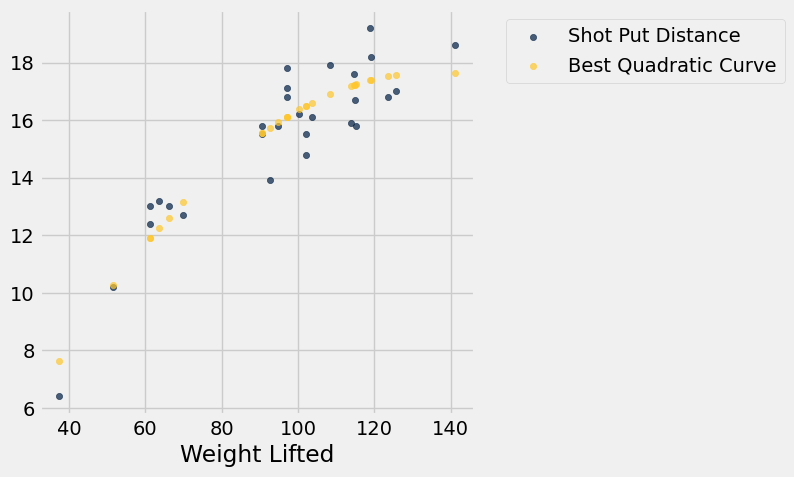

In [134]:
quad_fit = best_quad.item(0)*(weights**2) + best_quad.item(1)*weights + best_quad.item(2)
shotput.with_column('Best Quadratic Curve', quad_fit).scatter(0)

In [135]:
shotput_linear_rmse(0.09834382,  5.95962883)

1.219444484505928

In [136]:
shotput_quadratic_rmse(-1.04003731e-03,   2.82706003e-01,  -1.53167618e+00)

0.98188452306100782